# Assignment 2
by K. Sai Somanath, 18MCMT28

## Question 1
Implement PCA and LDA

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
def pca(data, components, std=True):
    if std:
        data_std = StandardScaler().fit_transform(data)
    else:
        data_std = data
    # print(data_std)
    cov = np.cov(data_std.T)
    eigen_values, eigen_vectors = np.linalg.eig(cov)
    # print(eigen_values, eigen_vectors, sep='\n')
    
    # Make a list of (eigenvalue, eigenvector) tuples
    eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]

    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eigen_pairs.sort()
    eigen_pairs.reverse()
    # print(eigen_pairs[0][1].shape)
    temp_t = tuple([eigen_pairs[x][1].reshape(data_std.shape[1], 1) for x in range(components)])

    matrix_w = np.hstack(temp_t)

    Y = data_std.dot(matrix_w)
    return Y

In [3]:
def lda(data, components):
    '''
    data: shape: classes x samples_size x no_features
    '''    
    # np.set_printoptions(precision=4)
    # Find the means
    means = np.mean(data, axis=1)
    # print(means)
    # Find the within class scatter matrix
    scatter_within = np.zeros((data.shape[-1], data.shape[-1]))
    for index, cls in enumerate(data):
        sc_mat = np.zeros((4,4))
        for row in cls:
            r, m = row.reshape(data.shape[-1], 1), means[index].reshape(data.shape[-1], 1)
            sc_mat += (r-m).dot((r-m).T)
        scatter_within += sc_mat
        
    # print(scatter_within)
    
    # Find the between class matrix
    mu = np.mean(data.reshape(data.shape[0] * data.shape[1], data.shape[2]), axis=0).reshape(data.shape[-1], 1)
    # print(mu)
    scatter_between = np.zeros((data.shape[-1], data.shape[-1]))
    for m in means:
        m = m.reshape(data.shape[-1], 1)
        # print(m, mu, sep='\n\n')
        scatter_between += data.shape[1] * (m - mu).dot((m - mu).T)
    
    # print(scatter_between)
    
    eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(scatter_within).dot(scatter_between))
    # print(eigen_values)
    
    # Make a list of (eigenvalue, eigenvector) tuples
    eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eigen_pairs.sort(key=lambda k: k[0], reverse=True)
    # print(eigen_pairs)
#     matrix_w = np.hstack((eigen_pairs[0][1]))
#     for k in range(1, components):
    temp_t = tuple([eigen_pairs[x][1].reshape(data.shape[-1], 1) for x in range(components)])
    # print(matrix_w)
    matrix_w = np.hstack(temp_t)
    Y = data.reshape(data.shape[0] * data.shape[1], data.shape[2]).dot(matrix_w)
    return Y

In [4]:
# Laod data
iris = np.genfromtxt('../iris.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3))

In [5]:
A = np.array([[1, 2], [3, 4], [5, 6]], dtype=np.float64)
# pca(iris, 2)

In [6]:
r = lda(iris[:100, :].reshape(2, 50, 4), 1)

In [7]:
def pcaPlots():
    results = pca(iris, 3)
    plt.scatter(x=results[:50, 0], y=results[:50, 1], c='r', label='Class 1')
    plt.scatter(x=results[50:100, 0], y=results[50:100, 1], c='g', label='Class 2')
    plt.scatter(x=results[100:, 0], y=results[100:, 1], c='b', label='Class 3')
    plt.title('PCA1 vs PCA2')
    plt.legend()
    plt.show()
    plt.scatter(x=results[:50, 0], y=results[:50, 2], c='r', label='Class 1')
    plt.scatter(x=results[50:100, 0], y=results[50:100, 2], c='g', label='Class 2')
    plt.scatter(x=results[100:, 0], y=results[100:, 2], c='b', label='Class 3')
    plt.title('PCA1 vs PCA3')
    plt.legend()
    plt.show()
    plt.scatter(x=results[:50, 1], y=results[:50, 2], c='r', label='Class 1')
    plt.scatter(x=results[50:100, 1], y=results[50:100, 2], c='g', label='Class 2')
    plt.scatter(x=results[100:, 1], y=results[100:, 2], c='b' , label='Class 3')
    plt.title('PCA2 vs PCA3')
    plt.legend()
    plt.show()

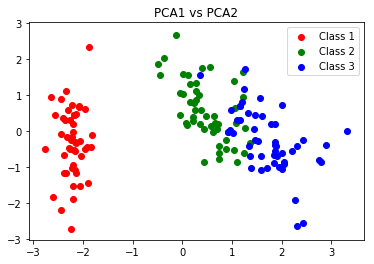

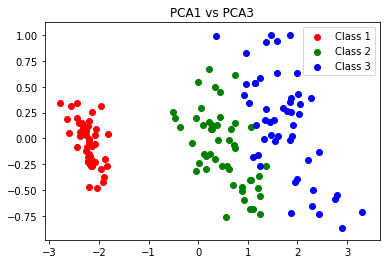

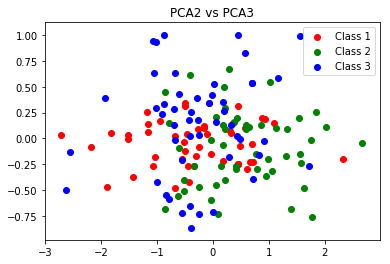

In [8]:
pcaPlots()

In [9]:
def ldaPlots():
    results = lda(iris[:100, :].reshape(2, 50, 4), 1)
    plt.scatter(x=results[:50], y=[0] * 50, c='r', label='Class 1')
    plt.scatter(x=results[50:], y=[0] * 50, c='g', label='Class 2')
    plt.title('Class 1 vs Class 2')
    plt.legend()
    plt.show()
    results = lda(iris[50:, :].reshape(2, 50, 4), 1)
    plt.scatter(x=results[:50], y=[0] * 50, c='r', label='Class 1')
    plt.scatter(x=results[50:], y=[0] * 50, c='g', label='Class 2')
    plt.title('Class 2 vs Class 3')
    plt.legend()
    plt.show()
    results = lda(np.vstack((iris[:50, :], iris[100:, :])).reshape(2, 50, 4), 1)
    plt.scatter(x=results[:50], y=[0] * 50, c='r', label='Class 1')
    plt.scatter(x=results[50:], y=[0] * 50, c='g', label='Class 2')
    plt.title('Class 1 vs Class 3')
    plt.legend()
    plt.show()

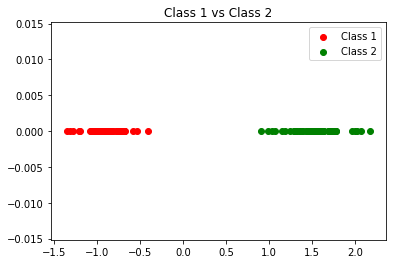

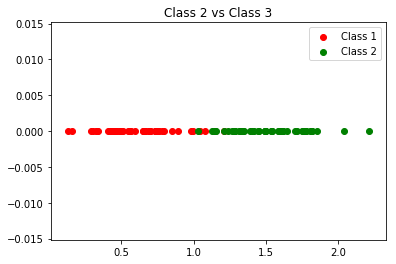

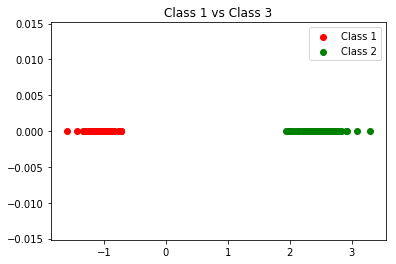

In [10]:
ldaPlots()